In [1]:
import pandas as pd
Wisconsin = pd.read_csv("Wisconsin.csv")
Wisconsin.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
#splitting the target column into two categories
Wisconsin['diagnosis'] = Wisconsin['diagnosis'].map({'M':1,'B':0})
Wisconsin.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Dropping the id column
Wisconsin = Wisconsin.drop(['id'], axis=1)



In [5]:
#checking for null values
Wisconsin.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
#deciding what features to drop based on correlation with the target column
Wisconsin.corr()['diagnosis'].sort_values()




smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave_points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave_points_mean        0

In [10]:
#dropping the columns with low correlation with the target column
Wisconsin = Wisconsin.drop(['texture_se','smoothness_se','symmetry_se','fractal_dimension_se','smoothness_mean','symmetry_mean','fractal_dimension_mean'], axis=1)
Wisconsin.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

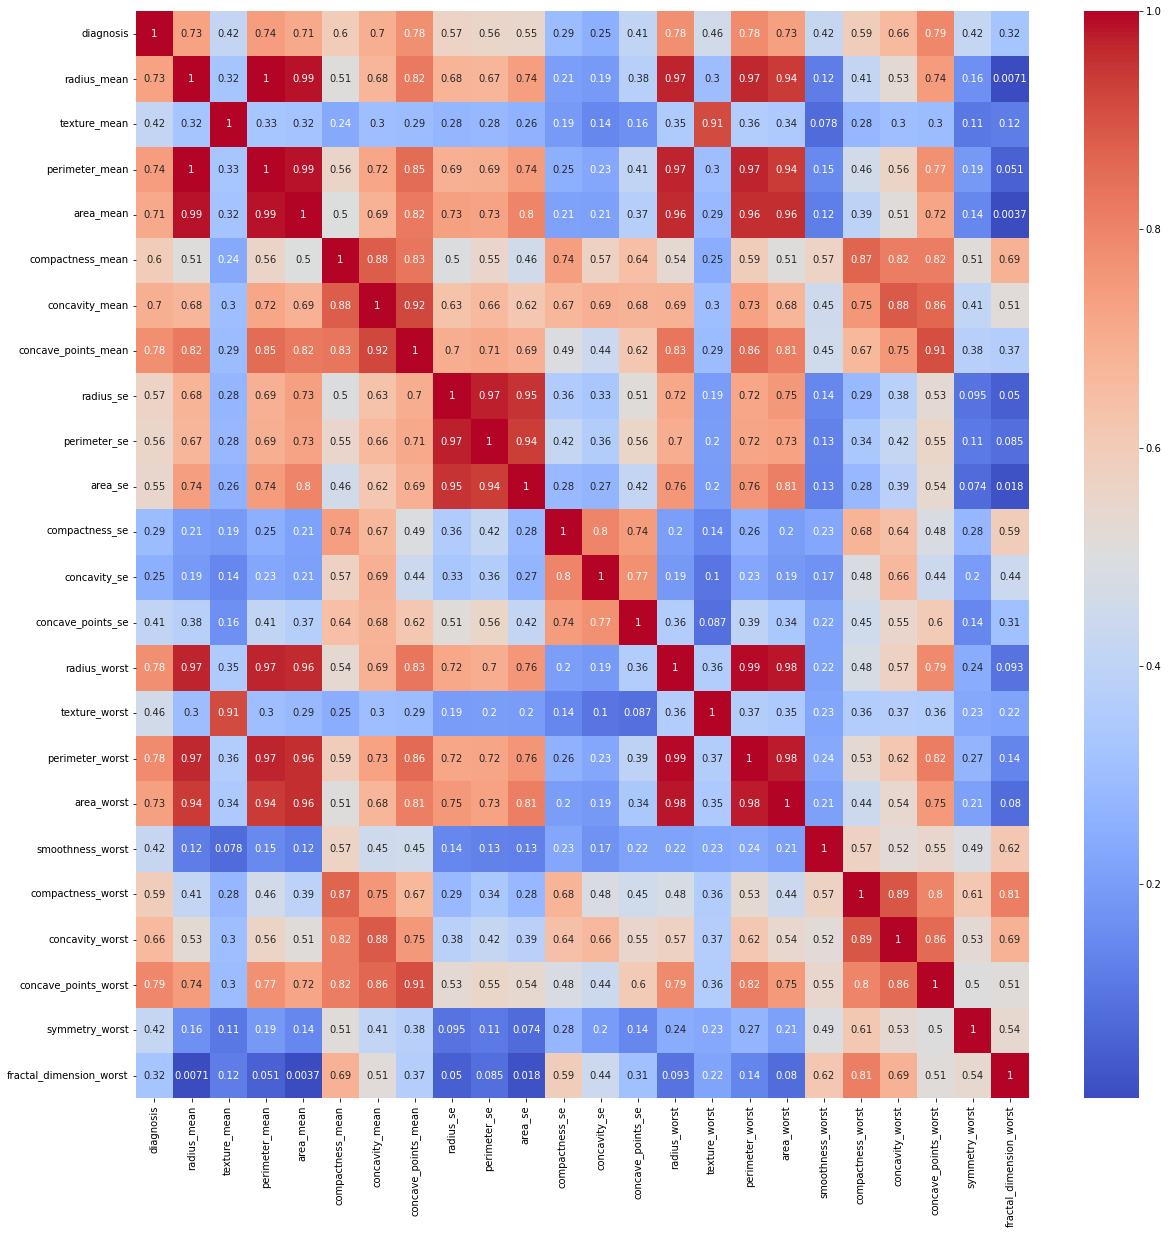

In [11]:
#visualizing the correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(Wisconsin.corr(), annot=True, cmap='coolwarm')

c:\Users\User\Documents\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\Documents\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\Documents\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\U

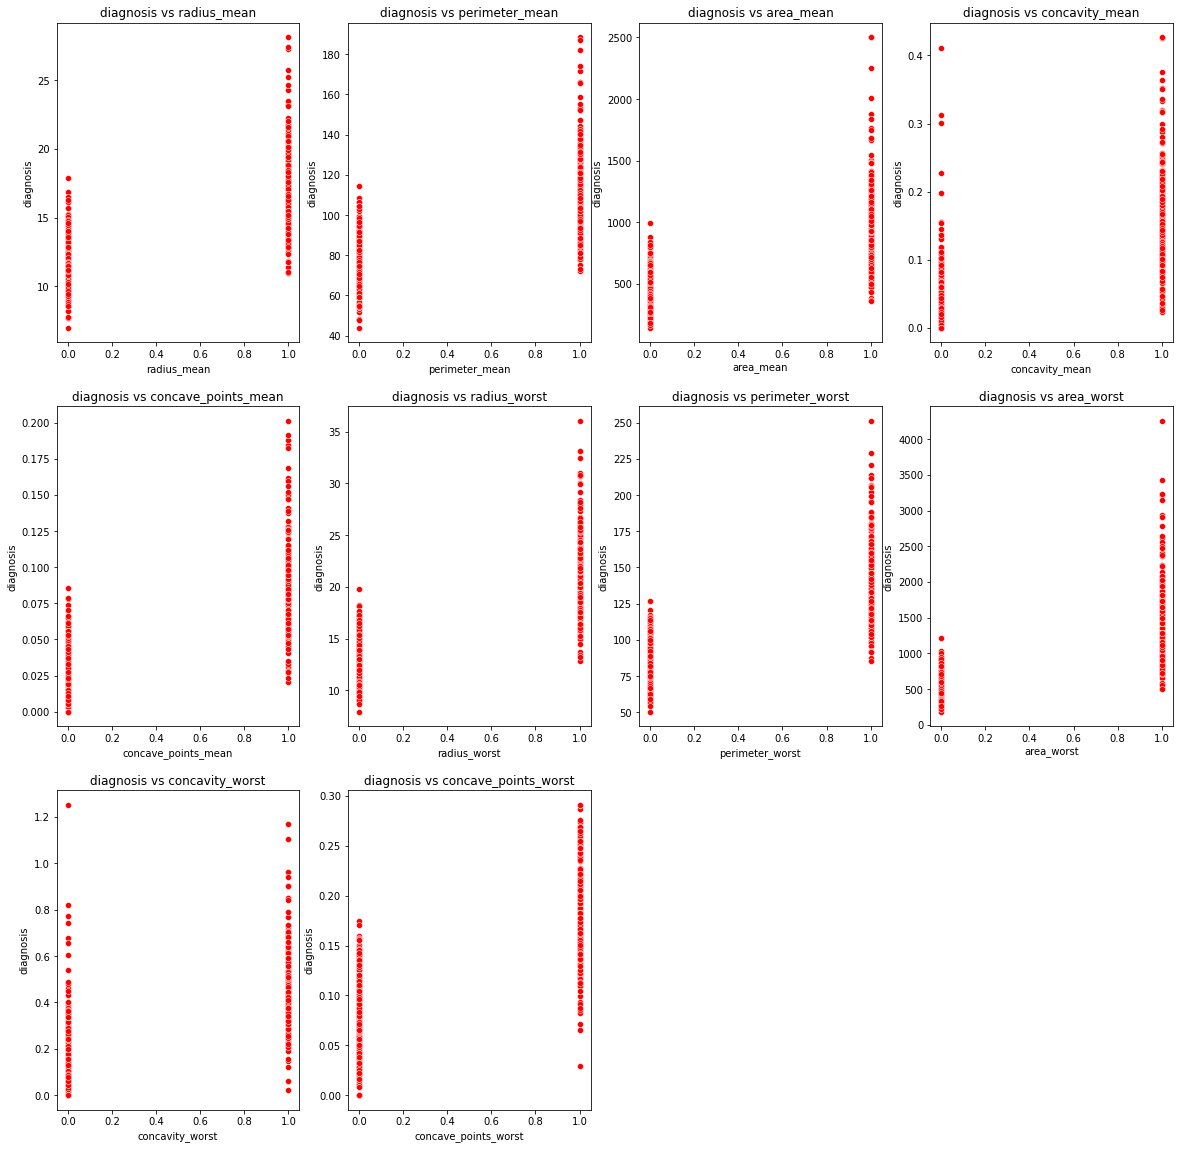

In [16]:
#visualizing features with high correlation with the target column
plt.figure(figsize=(20,20))
Features = ['radius_mean','perimeter_mean','area_mean','concavity_mean','concave_points_mean','radius_worst','perimeter_worst','area_worst','concavity_worst','concave_points_worst']
for i in range(0, len(Features)):
    plt.subplot(3,4,i+1)
    sns.scatterplot(Wisconsin['diagnosis'], Wisconsin[Features[i]], color='red')
    plt.xlabel(Features[i])
    plt.ylabel('diagnosis')
    plt.title('diagnosis vs ' + Features[i])

In [17]:
#splitting data into train, test, and validation sets
from sklearn.model_selection import train_test_split
X = Wisconsin.drop(['diagnosis'], axis=1)
y = Wisconsin['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=101)

In [22]:
#Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
kernels = ['Polynomial', 'RBF', 'Sigmoid',]
def Classifier(Type):
    if Type == 0:
        # Polynomial kernel
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif Type == 1:
        # Radial Basis Function kernel
        return SVC(kernel='rbf', gamma="auto")
    elif Type == 2:
        # Sigmoid kernel
        return SVC(kernel='sigmoid', gamma="auto")

In [30]:
for i in range(3):
    xtrain = X_train
    ytrain = y_train
    xtest = X_test
    ytest = y_test

    svclassifier = Classifier(i) 
    svclassifier.fit(xtrain, ytrain)
    y_pred2 = svclassifier.predict(xtest)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(ytest,y_pred2))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.37      1.00      0.54        42

    accuracy                           0.37       114
   macro avg       0.18      0.50      0.27       114
weighted avg       0.14      0.37      0.20       114

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39     

c:\Users\User\Documents\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\Documents\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\Documents\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\Documents\python\lib\si

In [31]:
#Naiive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
#Training evaluation
y_pred3 = gnb.predict(X_train)
print("Evaluation: Training set")
print(classification_report(y_train,y_pred3))

Evaluation: Training set
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       219
           1       0.96      0.89      0.92       122

    accuracy                           0.95       341
   macro avg       0.95      0.94      0.94       341
weighted avg       0.95      0.95      0.95       341



In [36]:
#validation evaluation
y_pred4 = gnb.predict(X_val)
print("Evaluation: Validation set")
print(classification_report(y_val,y_pred4))

Evaluation: Validation set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        66
           1       0.93      0.85      0.89        48

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



In [37]:
#Testing evaluation
y_pred5 = gnb.predict(X_test)
print("Evaluation: Testing set")
print(classification_report(y_test,y_pred5))

Evaluation: Testing set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [41]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
classifierAB = AdaBoostClassifier(
    DecisionTreeClassifier()  
)
classifierAB.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [42]:
#use grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))
        


In [43]:
cv = GridSearchCV(classifierAB, {'n_estimators':[50,100,150,200,250,300,350,400,450,500],
'learning_rate':[0.01,0.05,0.1,0.3,0.5,1]},
n_jobs=-1)
cv.fit(X_train, y_train)
print_results(cv)

BEST PARAMS: {'learning_rate': 0.3, 'n_estimators': 150}

0.924 (+/-0.057) for {'learning_rate': 0.01, 'n_estimators': 50}
0.909 (+/-0.073) for {'learning_rate': 0.01, 'n_estimators': 100}
0.921 (+/-0.066) for {'learning_rate': 0.01, 'n_estimators': 150}
0.915 (+/-0.082) for {'learning_rate': 0.01, 'n_estimators': 200}
0.93 (+/-0.075) for {'learning_rate': 0.01, 'n_estimators': 250}
0.912 (+/-0.081) for {'learning_rate': 0.01, 'n_estimators': 300}
0.924 (+/-0.065) for {'learning_rate': 0.01, 'n_estimators': 350}
0.921 (+/-0.06) for {'learning_rate': 0.01, 'n_estimators': 400}
0.921 (+/-0.06) for {'learning_rate': 0.01, 'n_estimators': 450}
0.927 (+/-0.067) for {'learning_rate': 0.01, 'n_estimators': 500}
0.93 (+/-0.053) for {'learning_rate': 0.05, 'n_estimators': 50}
0.924 (+/-0.06) for {'learning_rate': 0.05, 'n_estimators': 100}
0.927 (+/-0.072) for {'learning_rate': 0.05, 'n_estimators': 150}
0.921 (+/-0.06) for {'learning_rate': 0.05, 'n_estimators': 200}
0.921 (+/-0.061) for {'lea

In [44]:
#fitting using the best parameters
classifierAB2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=150,
    learning_rate=0.3
)
classifierAB2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01)

In [45]:
#training evaluation
y_pred6 = classifierAB2.predict(X_train)
print("Evaluation: Training set")
print(classification_report(y_train,y_pred6))

Evaluation: Training set
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       219
           1       0.97      0.93      0.95       122

    accuracy                           0.96       341
   macro avg       0.97      0.96      0.96       341
weighted avg       0.97      0.96      0.96       341



In [46]:
#validation evaluation
y_pred7 = classifierAB2.predict(X_val)
print("Evaluation: Validation set")
print(classification_report(y_val,y_pred7))

Evaluation: Validation set
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        66
           1       0.95      0.77      0.85        48

    accuracy                           0.89       114
   macro avg       0.90      0.87      0.88       114
weighted avg       0.89      0.89      0.88       114



In [47]:
#testing evaluation
y_pred8 = classifierAB2.predict(X_test)
print("Evaluation: Testing set")
print(classification_report(y_test,y_pred8))

Evaluation: Testing set
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

